<a href="https://colab.research.google.com/github/gy23/PracticeMachineLearning/blob/master/Practice_EtoE_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice end-to-end process with famous titanic dataset
I know the titanic dataset is famous so people don't even mention this as a project in their resumes. I practiced data science with this dataset while doing my master. After obtainng my master's degeree, I wasn't able to do data science projects for several months when working as a marketing data analyst, so I selected this famous dataset to review and practice. 

## Preprocessing

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [0]:
#import os
#os.getcwd()

In [3]:
titanic_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Titanic_kaggle_dataset/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

print(titanic_df.info())
print(titanic_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB
None
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454

Number of total rows: 891, so we think there might be NA value in Age, Cabin, and Embarked column.

In [5]:
print(titanic_df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


They have NA values (obviously)

In [6]:
# for Age, fill avg age for NA values:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
# for Cabin and Embarked, 'N':
titanic_df['Cabin'].fillna('N', inplace = True)
titanic_df['Embarked'].fillna('N', inplace = True)

# To check the dataset again
print(titanic_df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64


Check up some variables with text: Sex, Cabin, Embarked

In [7]:
print(titanic_df['Sex'].value_counts(), '\n')
print(titanic_df['Cabin'].value_counts(), '\n')
print(titanic_df['Embarked'].value_counts())

male      577
female    314
Name: Sex, dtype: int64 

N              687
C23 C25 C27      4
B96 B98          4
G6               4
C22 C26          3
              ... 
A36              1
A5               1
C45              1
D19              1
A16              1
Name: Cabin, Length: 148, dtype: int64 

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


Varibales, Sex and Embarked are distributed okay but Cabin is not okay. The first letter of cabin seems class of cabin, ex B, G, C...

In [8]:
titanic_df['Cabin'] = titanic_df['Cabin'].str.slice(stop=1)
#titanic_df['Cabin'] = titanic_df['Cabin'].str[0]
titanic_df['Cabin'].head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

Making a table like pivot table using groupby

In [9]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

## EDA

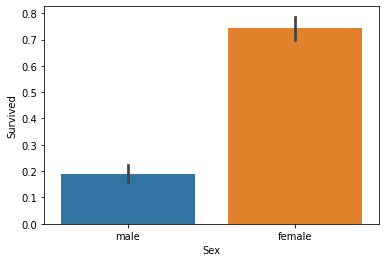

In [10]:
# plot (sex and survived)
sns.barplot(x='Sex', y='Survived', data=titanic_df)

Female survived more than male did.

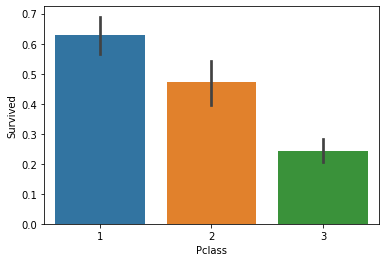

In [11]:
# plot (Pclass and survived)
sns.barplot(x='Pclass', y='Survived', data=titanic_df)

Higher class survived more than lower class did. 

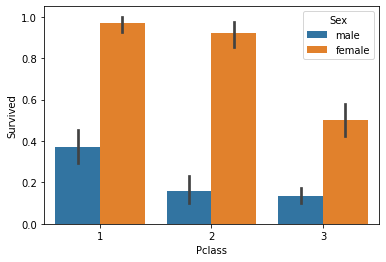

In [12]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

If female, the numbers of people survived in class 1 and 2 were not much different but class 3 couldn't survive as many as class 1 or 2. 
If male, in class 1 survived more. 

### Categorize age level

In [0]:
def categorize(age):
  cat = ''
  if age <=3: cat = 'Baby'
  elif age <=12: cat = 'Child'
  elif age <=18: cat = 'Adolescent'
  elif age <=39: cat = 'Young adult'
  elif age <=60: cat = 'Adult'
  else: cat = 'Elderly'

  return cat

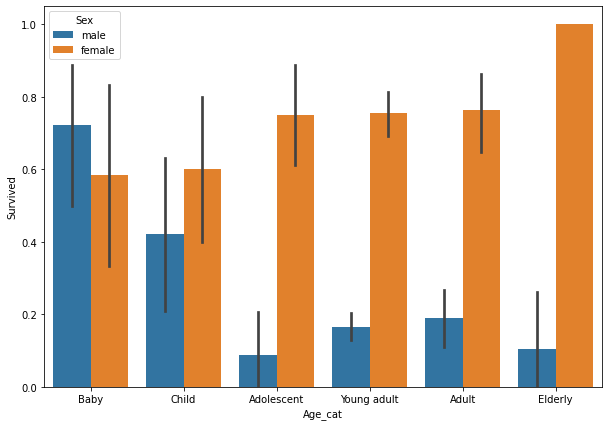

In [14]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: categorize(x))


group_names = ['Baby', 'Child', 'Adolescent', 'Young adult', 'Adult', 'Elderly']

plt.figure(figsize=(10, 7))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)


Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(df):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    l_encoder = LabelEncoder() # Generating an instance
    l_encoder.fit(df[feature]) # Fit
    df[feature] = l_encoder.transform(df[feature]) # Transform 
  return df

titanic_df = label_encoder(titanic_df)
titanic_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_cat
0,0,3,1,22.0,1,0,7.2500,7,3,Young adult
1,1,1,0,38.0,1,0,71.2833,2,0,Young adult
2,1,3,0,26.0,0,0,7.9250,7,3,Young adult
3,1,1,0,35.0,1,0,53.1000,2,3,Young adult
4,0,3,1,35.0,0,0,8.0500,7,3,Young adult


## Optimize Code Above

In [0]:
# Removing Null
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace = True)
  df['Cabin'].fillna('N', inplace = True)
  df['Embarked'].fillna('N', inplace = True)
  df['Fare'].fillna(0, inplace = True)
  return df

# Removing unnecesary features
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

# Label Encoding
def label_encoder(df):
  # use the first letter from Cabin feature
  df['Cabin'] = df['Cabin'].str.slice(stop=1)
  # three feature with string category
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    l_encoder = LabelEncoder()
    l_encoder.fit(df[feature])
    df[feature] = l_encoder.transform(df[feature])
  return df

# Call three functions at once
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = label_encoder(df)
  return df

In [0]:
titanic_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Titanic_kaggle_dataset/train.csv')

y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)
 

## Perform Machine Learning: 
  ### DecisionTree, RandomForest, LogisticRegression 
  ### with cross_validation(stratified Kfold) and GridSearchCV.

In [0]:
# import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

# import machine learning classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# Eval using Accuracy
from sklearn.metrics import accuracy_score

In [26]:
# generaing instance
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# Decision Tree
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print("Decision Tree-Accuracy: {}".format(accuracy_score(y_test, dt_pred)))

# Random Forest
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("Random Forest-Accuracy: {}".format(accuracy_score(y_test, rf_pred)))

# Random Forest
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print("Logistic Regression-Accuracy: {}".format(accuracy_score(y_test, lr_pred)))

Decision Tree-Accuracy: 0.7877094972067039
Random Forest-Accuracy: 0.8547486033519553
Logistic Regression-Accuracy: 0.8491620111731844


### Cross Validation (Stratifeid K-Fold built-in for Classification)

In [0]:
# Cross Validation (automatically perforemed with Stratified K-Fold)
from sklearn.model_selection import cross_val_score

def cv_scores(instance, X, y, n):
  scores = cross_val_score(instance, X, y, cv=n)
  for n_iter, accuracy in enumerate(scores):
    print("Iteration number {0}.  Accuracy: {1}".format(n_iter, accuracy))
  print("Avg Accuracy is {}".format(np.mean(scores)))

In [28]:
# CV - Decsion Tree
cv_scores(dt_clf, X_train, y_train, 5)

Iteration number 0.  Accuracy: 0.7482517482517482
Iteration number 1.  Accuracy: 0.7552447552447552
Iteration number 2.  Accuracy: 0.7676056338028169
Iteration number 3.  Accuracy: 0.795774647887324
Iteration number 4.  Accuracy: 0.7887323943661971
Avg Accuracy is 0.7711218359105683


In [29]:
# CV - Random Forest 
cv_scores(rf_clf, X_train, y_train, 5)

Iteration number 0.  Accuracy: 0.7272727272727273
Iteration number 1.  Accuracy: 0.7972027972027972
Iteration number 2.  Accuracy: 0.8309859154929577
Iteration number 3.  Accuracy: 0.8309859154929577
Iteration number 4.  Accuracy: 0.7394366197183099
Avg Accuracy is 0.7851767950359501


In [30]:
# CV - Logistic Regression
cv_scores(lr_clf, X_train, y_train, 5)

Iteration number 0.  Accuracy: 0.7762237762237763
Iteration number 1.  Accuracy: 0.7832167832167832
Iteration number 2.  Accuracy: 0.7816901408450704
Iteration number 3.  Accuracy: 0.8098591549295775
Iteration number 4.  Accuracy: 0.7464788732394366
Avg Accuracy is 0.7794937456909288


### GridSearchCV only for Descision Tree

In [31]:
# Grid Search Cross Validation only for DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dt_clf = GridSearchCV(dt_clf, param_grid=param_grid, scoring='accuracy', cv=5)
grid_dt_clf.fit(X_train, y_train)

# Best Parameters, Accuracy from GridSerchCV
print("Best Parameters: ", grid_dt_clf.best_params_)
print("Best Accuracy: ", grid_dt_clf.best_score_)

# Predict and Accuracy with optimized estimator from GridSearchCV
best_dt_clf = grid_dt_clf.best_estimator_

pred = best_dt_clf.predict(X_test)
print("Accuracy with the best estimator: ", accuracy_score(y_test, pred))


Best Parameters:  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Accuracy:  0.7991825076332119
Accuracy with the best estimator:  0.8715083798882681


### Result
Comparing the accuracy of Decision Tree from Cross Validation and Grid Search, the accuracy of Grid Search, 0.87, is the best. 